In [2]:
import pandas as pd

def load_data(path: str):
  years = list(range(2005, 2020))
  year2index = { y : i for (i, y) in enumerate(years) }
  data = [pd.read_excel(path, sheet_name=str(y)) for y in years]
  return data, years, year2index

data, years, year2index = load_data("./data/Brazilian Immigrants.xlsx")
data[year2index[2005]].head()


,Type,State Code,1.0,2.0,4.0,5.0,6.0,8.0,9.0,10.0,...,41.0,42.0,44.0,45.0,47.0,48.0,49.0,51.0,53.0,55.0
0,Population,Population,2030.0,88.0,1288.0,861.0,25111.0,1339.0,14021.0,296.0,...,571.0,7019.0,1143.0,2339.0,1355.0,7921.0,2904.0,6471.0,2505.0,804.0
1,Age,Age 0 to 4,78.0,0.0,0.0,0.0,305.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,87.0,0.0,0.0
2,Age,Age 05 to 09,172.0,0.0,0.0,116.0,1039.0,84.0,333.0,0.0,...,0.0,157.0,0.0,0.0,0.0,283.0,182.0,1180.0,0.0,85.0
3,Age,Age 10 to 19,242.0,0.0,0.0,0.0,2920.0,0.0,1309.0,0.0,...,0.0,748.0,0.0,119.0,0.0,382.0,360.0,439.0,467.0,213.0
4,Age,Age 20 to 24,0.0,0.0,67.0,0.0,1910.0,0.0,2153.0,104.0,...,120.0,795.0,75.0,577.0,0.0,831.0,154.0,394.0,97.0,0.0


In [4]:
def load_state_dict(path: str):
  data = pd.read_excel(path, sheet_name="State code")
  state_dict = dict()

  for i in data.index:
    abbrev = data["State Abbreviation"][i].lower()
    name = data["State Name"][i].lower()
    code = data["FIPS Code"][i]
    
    state_dict[code] = {
      "name": name,
      "abbrev": abbrev
    }

  return state_dict

state_dict = load_state_dict("./data/Brazilian Immigrants.xlsx")
state_dict

{1.0: {'name': 'alabama', 'abbrev': 'al'},
 2.0: {'name': 'alaska', 'abbrev': 'ak'},
 4.0: {'name': 'arizona', 'abbrev': 'az'},
 5.0: {'name': 'arkansas', 'abbrev': 'ar'},
 6.0: {'name': 'california', 'abbrev': 'ca'},
 8.0: {'name': 'colorado', 'abbrev': 'co'},
 9.0: {'name': 'connecticut', 'abbrev': 'ct'},
 10.0: {'name': 'delaware', 'abbrev': 'de'},
 11.0: {'name': 'district of columbia', 'abbrev': 'dc'},
 12.0: {'name': 'florida', 'abbrev': 'fl'},
 13.0: {'name': 'georgia', 'abbrev': 'ga'},
 15.0: {'name': 'hawaii', 'abbrev': 'hi'},
 16.0: {'name': 'idaho', 'abbrev': 'id'},
 17.0: {'name': 'illinois', 'abbrev': 'il'},
 18.0: {'name': 'indiana', 'abbrev': 'in'},
 19.0: {'name': 'iowa', 'abbrev': 'ia'},
 20.0: {'name': 'kansas', 'abbrev': 'ks'},
 21.0: {'name': 'kentucky', 'abbrev': 'ky'},
 22.0: {'name': 'louisiana', 'abbrev': 'la'},
 23.0: {'name': 'maine', 'abbrev': 'me'},
 24.0: {'name': 'maryland', 'abbrev': 'md'},
 25.0: {'name': 'massachusetts', 'abbrev': 'ma'},
 26.0: {'name':

In [5]:
def query_by_attr_year(attr: str, year: int):
  df = data[year2index[year]]
  row = df.loc[df.iloc[:, 1] == attr]
  return row

row = query_by_attr_year("Population", 2005)
row.head()

,Type,State Code,1.0,2.0,4.0,5.0,6.0,8.0,9.0,10.0,...,41.0,42.0,44.0,45.0,47.0,48.0,49.0,51.0,53.0,55.0
0,Population,Population,2030.0,88.0,1288.0,861.0,25111.0,1339.0,14021.0,296.0,...,571.0,7019.0,1143.0,2339.0,1355.0,7921.0,2904.0,6471.0,2505.0,804.0


In [6]:
def query_by_attr_year_state(attr: str, year: int, state: int):
  row = query_by_attr_year(attr, year)
  return row[state].to_numpy()[0]

value = query_by_attr_year_state("Female", 2005, 1)
value

961.0

In [7]:
def query_attr_over_years_by_state(attr: str, state: int):
  return[query_by_attr_year_state(attr, y, state) for y in years]

query_attr_over_years_by_state("Population", 1)

[2030.0,
 1370.0,
 510.0,
 473.0,
 803.0,
 2192.0,
 1984.0,
 130.0,
 772.0,
 941.0,
 521.0,
 308.0,
 1781.0,
 2374.0,
 1855.0]

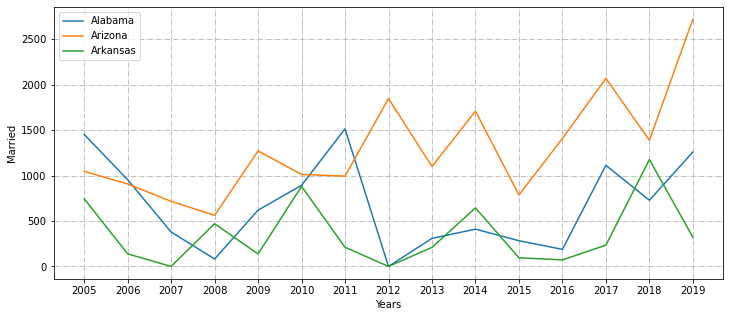

In [8]:
from typing import List
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def compare_states(attr: str, states: List[int]):
  values_by_state = [query_attr_over_years_by_state(attr, state) for state in states]
  
  plt.figure(figsize=(12, 5))

  for (i, values) in enumerate(values_by_state):
    plt.plot(years, values, label=state_dict[states[i]]["name"].title())
  
  plt.xlabel("Years")
  plt.ylabel(attr)

  plt.gca().xaxis.set_major_locator(MultipleLocator(1))
  plt.legend()
  plt.grid(linestyle="-.")

compare_states("Married", [1, 4, 5])